# IBM Attrition

In [1]:
# Bring in dependancies 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Read in file
file_path = "ibm_attrition.csv"
df = pd.read_csv(file_path)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
# Drop columns not to be used in this dataset
df = df.drop(columns=["EmployeeCount", "EmployeeNumber"])
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,4,80,1,6,3,3,2,2,2,2


In [4]:
# Create dummy columns for catergorical data
df_dummy = pd.get_dummies(df, columns=[
    "BusinessTravel",
    "Department",
    "EducationField",
    "Gender",
    "JobRole",
    "MaritalStatus",
    "Over18",
    "OverTime",
])

df_dummy.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,Yes,1102,1,2,2,94,3,2,4,...,0,0,1,0,0,0,1,1,0,1
1,49,No,279,8,1,3,61,2,2,2,...,0,1,0,0,0,1,0,1,1,0
2,37,Yes,1373,2,2,4,92,2,1,3,...,0,0,0,0,0,0,1,1,0,1
3,33,No,1392,3,4,4,56,3,1,3,...,0,1,0,0,0,1,0,1,0,1
4,27,No,591,2,1,1,40,3,1,2,...,0,0,0,0,0,1,0,1,1,0


# KNN Model

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [6]:

KNN_df_dummy = df_dummy
KNN_df_dummy['Attrition'] = KNN_df_dummy['Attrition'].map({'Yes': 1, 'No': 0})
KNN_y = [val for val in KNN_df_dummy.Attrition]
KNN_df_dummy = KNN_df_dummy.drop(columns=["Attrition"])

KNN_df_dummy = KNN_df_dummy[[
    'JobLevel',
    'MonthlyIncome',
    'NumCompaniesWorked',
    'PerformanceRating',
    'TotalWorkingYears',
    'YearsAtCompany',
    'YearsInCurrentRole',
    'YearsSinceLastPromotion',
    'YearsWithCurrManager',
    'BusinessTravel_Travel_Rarely',
    'Department_Research & Development',
    'Department_Sales',
    'EducationField_Human Resources',
    'EducationField_Marketing',
    'EducationField_Medical',
    'EducationField_Technical Degree',
    'Gender_Male',
    'JobRole_Human Resources',
    'JobRole_Laboratory Technician',
    'JobRole_Manager',
    'JobRole_Research Director',
    'JobRole_Research Scientist',
    'JobRole_Sales Executive',
    'JobRole_Sales Representative',
    'MaritalStatus_Divorced',
    'MaritalStatus_Married',
    'MaritalStatus_Single',
    'OverTime_Yes']]

In [7]:
KNN_X = []

for i in range(len(KNN_df_dummy.index)):
    info = []
    
    for col in list(KNN_df_dummy.columns):   
        info.append(list(KNN_df_dummy[col])[i])
    
    KNN_X.append(info)

In [8]:
KNN_X_train, KNN_X_test, KNN_y_train, KNN_y_test = train_test_split(KNN_X, KNN_y)

KNN_X_train = np.array(KNN_X_train)
KNN_X_test = np.array(KNN_X_test)
KNN_y_train = np.array(KNN_y_train)
KNN_y_test = np.array(KNN_y_test)

In [9]:

KNN_X_scaler = StandardScaler().fit(KNN_X_train.reshape(-1, 1))

KNN_X_train_scaled = KNN_X_scaler.transform(KNN_X_train)
KNN_X_test_scaled = KNN_X_scaler.transform(KNN_X_test)

C:\Users\39319362\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


k: 1, Train/Test Score: 1.000/0.785
k: 3, Train/Test Score: 0.863/0.796
k: 5, Train/Test Score: 0.853/0.815
k: 7, Train/Test Score: 0.850/0.823
k: 9, Train/Test Score: 0.841/0.840
k: 11, Train/Test Score: 0.838/0.842
k: 13, Train/Test Score: 0.839/0.837
k: 15, Train/Test Score: 0.842/0.840
k: 17, Train/Test Score: 0.838/0.840
k: 19, Train/Test Score: 0.840/0.834
k: 21, Train/Test Score: 0.840/0.834
k: 23, Train/Test Score: 0.840/0.834
k: 25, Train/Test Score: 0.840/0.837
k: 27, Train/Test Score: 0.838/0.840
k: 29, Train/Test Score: 0.838/0.840
k: 31, Train/Test Score: 0.838/0.840
k: 33, Train/Test Score: 0.838/0.840
k: 35, Train/Test Score: 0.838/0.840
k: 37, Train/Test Score: 0.838/0.840
k: 39, Train/Test Score: 0.838/0.840


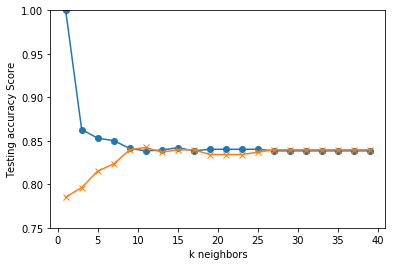

In [10]:
train_scores = []
test_scores = []
for k in range(1, 40, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(KNN_X_train_scaled, KNN_y_train)
    train_score = knn.score(KNN_X_train_scaled, KNN_y_train)
    test_score = knn.score(KNN_X_test_scaled, KNN_y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 40, 2), train_scores, marker='o')
plt.plot(range(1, 40, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.ylim(top=1, bottom=0.75)

# Save the Figure
plt.savefig("KNN.png")

plt.show()

# SVM Model

In [11]:
# Import dependecies
from sklearn.neighbors import KNeighborsClassifier
import os
from matplotlib import style
style.use("ggplot")

In [12]:
SVM_df = df_dummy
SVM_df['Attrition'] = SVM_df['Attrition'].map({'Yes': 1, 'No': 0})
SVM_df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,NaN,1102,1,2,2,94,3,2,4,...,0,0,1,0,0,0,1,1,0,1
1,49,NaN,279,8,1,3,61,2,2,2,...,0,1,0,0,0,1,0,1,1,0
2,37,NaN,1373,2,2,4,92,2,1,3,...,0,0,0,0,0,0,1,1,0,1
3,33,NaN,1392,3,4,4,56,3,1,3,...,0,1,0,0,0,1,0,1,0,1
4,27,NaN,591,2,1,1,40,3,1,2,...,0,0,0,0,0,1,0,1,1,0


In [13]:
SVM_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
count,1470.000000,0.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000
mean,36.923810,NaN,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,...,0.054422,0.198639,0.221769,0.056463,0.222449,0.457823,0.319728,1.0,0.717007,0.282993
std,9.135373,NaN,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,...,0.226925,0.399112,0.415578,0.230891,0.416033,0.498387,0.466530,0.0,0.450606,0.450606
min,18.000000,NaN,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
25%,30.000000,NaN,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
50%,36.000000,NaN,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.000000,0.000000
75%,43.000000,NaN,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0,1.000000,1.000000
max,60.000000,NaN,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000


In [14]:
SVM_target = df["Attrition"]
SVM_target_names = ["Left", "Retained"]

In [15]:
SVM_data = SVM_df.drop("Attrition", axis=1)
feature_names = SVM_data.columns
SVM_data.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,...,0,0,1,0,0,0,1,1,0,1
1,49,279,8,1,3,61,2,2,2,5130,...,0,1,0,0,0,1,0,1,1,0
2,37,1373,2,2,4,92,2,1,3,2090,...,0,0,0,0,0,0,1,1,0,1
3,33,1392,3,4,4,56,3,1,3,2909,...,0,1,0,0,0,1,0,1,0,1
4,27,591,2,1,1,40,3,1,2,3468,...,0,0,0,0,0,1,0,1,1,0


In [16]:
from sklearn.model_selection import train_test_split
SVM_X_train, SVM_X_test, SVM_y_train, SVM_y_test = train_test_split(SVM_data, SVM_target, random_state=42)

In [17]:
# include scaling in pre-processing step to decrease time consumed.
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(-1,1)).fit(SVM_X_train)
SVM_X_train = scaling.transform(SVM_X_train)
SVM_X_test = scaling.transform(SVM_X_test)

In [18]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
SVM_model = SVC(kernel='linear')
SVM_model.fit(SVM_X_train, SVM_y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [19]:
# Model Accuracy
print('Test Acc: %.3f' % SVM_model.score(SVM_X_test, SVM_y_test))

Test Acc: 0.902


In [20]:
# Calculate classification report
from sklearn.metrics import classification_report
SVM_predictions = SVM_model.predict(SVM_X_test)
print(classification_report(SVM_y_test, SVM_predictions,
                            target_names= SVM_target_names))

             precision    recall  f1-score   support

       Left       0.92      0.97      0.95       320
   Retained       0.70      0.44      0.54        48

avg / total       0.89      0.90      0.89       368



# Liner Regrssion, Lasso, Ridge, and Elastic 

In [21]:
LRE_df=df
LRE_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,4,80,1,6,3,3,2,2,2,2


In [22]:
LRE_df_dummy = pd.get_dummies(df, columns=[
    "Attrition",
    "BusinessTravel",
    "Department",
    "EducationField",
    "Gender",
    "JobRole",
    "MaritalStatus",
    "Over18",
    "OverTime",
])

In [23]:
LRE_X = LRE_df_dummy[['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
        'JobSatisfaction','MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Attrition_No', 'Attrition_Yes', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Female', 'Gender_Male',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'Over18_Y',
       'OverTime_No', 'OverTime_Yes']]

LRE_y = LRE_df_dummy['MonthlyIncome'].values.reshape(-1, 1)
print(LRE_X.shape, LRE_y.shape)

(1470, 54) (1470, 1)


In [24]:
from sklearn.model_selection import train_test_split

LRE_X_train, LRE_X_test, LRE_y_train, LRE_y_test = train_test_split(LRE_X, LRE_y, random_state=42)

In [25]:
from sklearn.preprocessing import StandardScaler

LRE_X_scaler = StandardScaler().fit(LRE_X_train)
LRE_y_scaler = StandardScaler().fit(LRE_y_train)

C:\Users\39319362\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [26]:
LRE_X_train_scaled = LRE_X_scaler.transform(LRE_X_train)
LRE_X_test_scaled = LRE_X_scaler.transform(LRE_X_test)
LRE_y_train_scaled = LRE_y_scaler.transform(LRE_y_train)
LRE_y_test_scaled = LRE_y_scaler.transform(LRE_y_test)

C:\Users\39319362\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [27]:
from sklearn.linear_model import LinearRegression
LRE_model = LinearRegression()
LRE_model.fit(LRE_X_train_scaled, LRE_y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

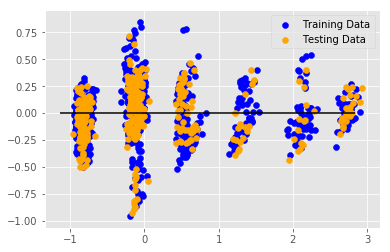

In [28]:
LRE_predictions = LRE_model.predict(LRE_X_test_scaled)
LRE_model.fit(LRE_X_train_scaled, LRE_y_train_scaled)
plt.scatter(LRE_model.predict(LRE_X_train_scaled), LRE_model.predict(LRE_X_train_scaled) - LRE_y_train_scaled, c="blue", label="Training Data")
plt.scatter(LRE_model.predict(LRE_X_test_scaled), LRE_model.predict(LRE_X_test_scaled) - LRE_y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=LRE_y_test_scaled.min(), xmax=LRE_y_test_scaled.max())

# Save the Figure
plt.savefig("LinearIncome.png")

plt.show()

In [29]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(LRE_y_test_scaled, LRE_predictions)
r2 = LRE_model.score(LRE_X_test_scaled, LRE_y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.061285092352730566, R2: 0.9377139349461681


In [30]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(LRE_X_train_scaled, LRE_y_train_scaled)

LRE_predictions = lasso.predict(LRE_X_test_scaled)

MSE = mean_squared_error(LRE_y_test_scaled, LRE_predictions)
r2 = lasso.score(LRE_X_test_scaled, LRE_y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.06251450710401571, R2: 0.936464440097797


In [31]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(LRE_X_train_scaled, LRE_y_train_scaled)

LRE_predictions = ridge.predict(LRE_X_test_scaled)

MSE = mean_squared_error(LRE_y_test_scaled, LRE_predictions)
r2 = ridge.score(LRE_X_test_scaled, LRE_y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.060794928702508196, R2: 0.9382121044655849


In [32]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(LRE_X_train_scaled, LRE_y_train_scaled)

LRE_predictions = elasticnet.predict(LRE_X_test_scaled)

MSE = mean_squared_error(LRE_y_test_scaled, LRE_predictions)
r2 = elasticnet.score(LRE_X_test_scaled, LRE_y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.06116342585402359, R2: 0.9378375886303254


In [33]:
LRE2_df_dummy = pd.get_dummies(df, columns=[
    "BusinessTravel",
    "Department",
    "EducationField",
    "Gender",
    "JobRole",
    "MaritalStatus",
    "Over18",
    "OverTime",
])

LRE2_df_dummy['Attrition'] = LRE2_df_dummy['Attrition'].map({'Yes': 1, 'No': 0})
LRE2_df_dummy.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1,1102,1,2,2,94,3,2,4,...,0,0,1,0,0,0,1,1,0,1
1,49,0,279,8,1,3,61,2,2,2,...,0,1,0,0,0,1,0,1,1,0
2,37,1,1373,2,2,4,92,2,1,3,...,0,0,0,0,0,0,1,1,0,1
3,33,0,1392,3,4,4,56,3,1,3,...,0,1,0,0,0,1,0,1,0,1
4,27,0,591,2,1,1,40,3,1,2,...,0,0,0,0,0,1,0,1,1,0


In [34]:
LRE2_X = LRE_df_dummy[['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
        'JobSatisfaction','MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
        'BusinessTravel_Non-Travel', 'MonthlyIncome',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Female', 'Gender_Male',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'Over18_Y',
       'OverTime_No', 'OverTime_Yes']]

LRE2_y = LRE2_df_dummy['Attrition'].values.reshape(-1, 1)
print(LRE2_X.shape, LRE2_y.shape)

(1470, 53) (1470, 1)


In [35]:
from sklearn.model_selection import train_test_split

LRE2_X_train, LRE2_X_test, LRE2_y_train, LRE2_y_test = train_test_split(LRE2_X, LRE2_y, random_state=42)

In [36]:
from sklearn.preprocessing import StandardScaler

LRE2_X_scaler = StandardScaler().fit(LRE2_X_train)
LRE2_y_scaler = StandardScaler().fit(LRE2_y_train)

C:\Users\39319362\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [37]:
LRE2_X_train_scaled = LRE2_X_scaler.transform(LRE2_X_train)
LRE2_X_test_scaled = LRE2_X_scaler.transform(LRE2_X_test)
LRE2_y_train_scaled = LRE2_y_scaler.transform(LRE2_y_train)
LRE2_y_test_scaled = LRE2_y_scaler.transform(LRE2_y_test)

C:\Users\39319362\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [38]:
from sklearn.linear_model import LinearRegression
LRE2_model = LinearRegression()
LRE2_model.fit(LRE2_X_train_scaled, LRE2_y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

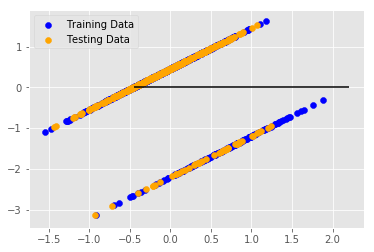

In [39]:
LRE2_predictions = LRE2_model.predict(LRE2_X_test_scaled)
LRE2_model.fit(LRE2_X_train_scaled, LRE2_y_train_scaled)
plt.scatter(LRE2_model.predict(LRE2_X_train_scaled), LRE2_model.predict(LRE2_X_train_scaled) - LRE2_y_train_scaled, c="blue", label="Training Data")
plt.scatter(LRE2_model.predict(LRE2_X_test_scaled), LRE2_model.predict(LRE2_X_test_scaled) - LRE2_y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=LRE2_y_test_scaled.min(), xmax=LRE2_y_test_scaled.max())

# Save the Figure
plt.savefig("LinearAttrition.png")

plt.show()

# Normal Neural Network

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

In [41]:
NNN_df_dummy=df
# Create dummy columns for catergorical data
NNN_df_dummy = pd.get_dummies(df, columns=[
    "BusinessTravel",
    "Department",
    "EducationField",
    "Gender",
    "JobRole",
    "MaritalStatus",
    "Over18",
    "OverTime",
])

NNN_df_dummy.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,Yes,1102,1,2,2,94,3,2,4,...,0,0,1,0,0,0,1,1,0,1
1,49,No,279,8,1,3,61,2,2,2,...,0,1,0,0,0,1,0,1,1,0
2,37,Yes,1373,2,2,4,92,2,1,3,...,0,0,0,0,0,0,1,1,0,1
3,33,No,1392,3,4,4,56,3,1,3,...,0,1,0,0,0,1,0,1,0,1
4,27,No,591,2,1,1,40,3,1,2,...,0,0,0,0,0,1,0,1,1,0


In [42]:
NNN_X = NNN_df_dummy.drop("Attrition", axis=1)
NNN_y = NNN_df_dummy["Attrition"]
print(NNN_X.shape, NNN_y.shape)

(1470, 53) (1470,)


In [43]:
NNN_X_train, NNN_X_test, NNN_y_train, NNN_y_test = train_test_split(
    NNN_X, NNN_y, random_state=1, stratify=NNN_y)

In [44]:
NNN_X_scaler = MinMaxScaler().fit(NNN_X_train)
NNN_X_train_scaled = NNN_X_scaler.transform(NNN_X_train)
NNN_X_test_scaled = NNN_X_scaler.transform(NNN_X_test)

In [45]:
# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(NNN_y_train)
encoded_y_train = label_encoder.transform(NNN_y_train)
encoded_y_test = label_encoder.transform(NNN_y_test)

In [46]:
# Step 2: Convert encoded labels to one-hot-encoding
NNN_y_train_categorical = to_categorical(encoded_y_train)
NNN_y_test_categorical = to_categorical(encoded_y_test)

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [48]:
# Create model and add layers
model = Sequential()
model.add(Dense(units=100, activation='relu', input_dim=53))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [49]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               5400      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 202       
Total params: 15,702
Trainable params: 15,702
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.fit(
    NNN_X_train_scaled,
    NNN_y_train_categorical,
    epochs=60,
    shuffle=True,
    verbose=3
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/60
Epoch 2/60
Epoch 3/60
Epoch 4/60
Epoch 5/60
Epoch 6/60
Epoch 7/60
Epoch 8/60
Epoch 9/60
Epoch 10/60
Epoch 11/60
Epoch 12/60
Epoch 13/60
Epoch 14/60
Epoch 15/60
Epoch 16/60
Epoch 17/60
Epoch 18/60
Epoch 19/60
Epoch 20/60
Epoch 21/60
Epoch 22/60
Epoch 23/60
Epoch 24/60
Epoch 25/60
Epoch 26/60
Epoch 27/60
Epoch 28/60
Epoch 29/60
Epoch 30/60
Epoch 31/60
Epoch 32/60
Epoch 33/60
Epoch 34/60
Epoch 35/60
Epoch 36/60
Epoch 37/60
Epoch 38/60
Epoch 39/60
Epoch 40/60
Epoch 41/60
Epoch 42/60
Epoch 43/60
Epoch 44/60
Epoch 45/60
Epoch 46/60
Epoch 47/60
Epoch 48/60
Epoch 49/60
Epoch 50/60
Epoch 51/60
Epoch 52/60
Epoch 53/60
Epoch 54/60
Epoch 55/60
Epoch 56/60
Epoch 57/60
Epoch 58/60
Epoch 59/60
Epoch 60/60


In [51]:
model_loss, model_accuracy = model.evaluate(
    NNN_X_test_scaled, NNN_y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

 - 0s - loss: 0.7815 - acc: 0.8777
Normal Neural Network - Loss: 0.7814720298932947, Accuracy: 0.8777173757553101


In [52]:
encoded_predictions = model.predict_classes(NNN_X_test_scaled[:5])
prediction_labels = label_encoder.inverse_transform(encoded_predictions)
print(f"Predicted classes: {prediction_labels}")
print(f"Actual Labels: {list(NNN_y_test[:5])}")

Predicted classes: ['No' 'No' 'No' 'No' 'No']
Actual Labels: ['No', 'No', 'No', 'No', 'No']


C:\Users\39319362\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# FeatureSelector

In [53]:
from feature_selector import FeatureSelector

In [54]:
train_labels = NNN_df_dummy['Attrition']
train = NNN_df_dummy.drop(columns = ['Attrition'])

In [55]:
fs = FeatureSelector(data = train, labels = train_labels)
fs.identify_collinear(correlation_threshold=0.7)
correlated_features = fs.ops['collinear']
correlated_features[:]

11 features with a correlation magnitude greater than 0.70.



['MonthlyIncome',
 'PerformanceRating',
 'TotalWorkingYears',
 'YearsInCurrentRole',
 'YearsWithCurrManager',
 'BusinessTravel_Travel_Rarely',
 'Department_Sales',
 'Gender_Male',
 'JobRole_Human Resources',
 'JobRole_Sales Executive',
 'OverTime_Yes']

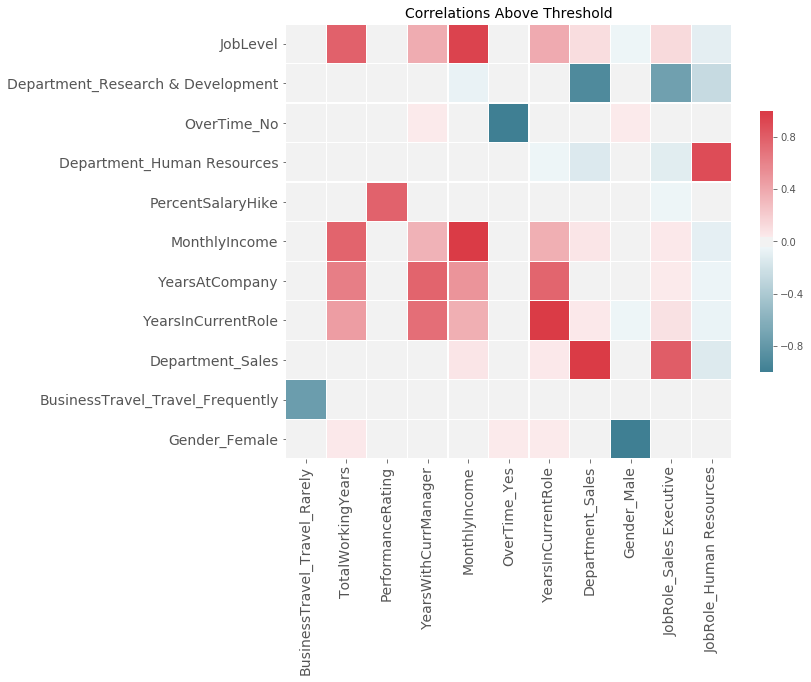

In [56]:
fs.plot_collinear()
# Save the Figure
plt.savefig("CorrelationsAboveThreshold.png")

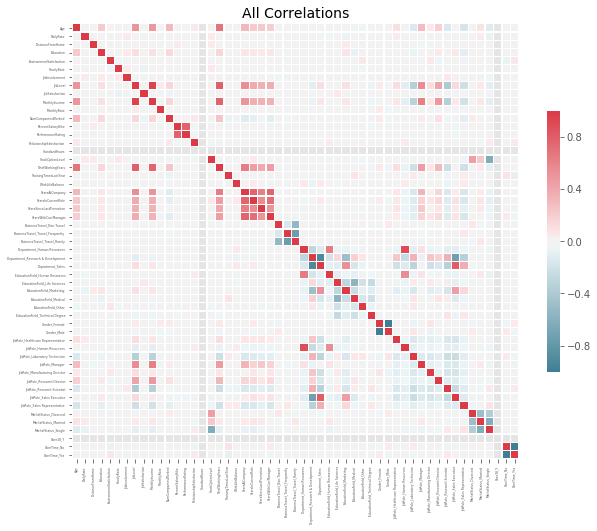

In [57]:
fs.plot_collinear(plot_all=True)
# Save the Figure
plt.savefig("CorrelationsAll.png")

In [59]:
# Pass in the appropriate parameters
fs.identify_zero_importance(task = 'classification', 
                            eval_metric = 'auc', 
                            n_iterations = 10, 
                             early_stopping = True)
# list of zero importance features
zero_importance_features = fs.ops['zero_importance']

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[44]	valid_0's binary_logloss: 0.33845	valid_0's auc: 0.791171
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[50]	valid_0's binary_logloss: 0.410241	valid_0's auc: 0.823218
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[51]	valid_0's binary_logloss: 0.422776	valid_0's auc: 0.793561
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[60]	valid_0's binary_logloss: 0.328324	valid_0's auc: 0.836075
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[86]	valid_0's binary_logloss: 0.315605	valid_0's auc: 0.900904
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[36]	valid_0's binary_logloss: 0.358463	valid_0's auc: 0.73

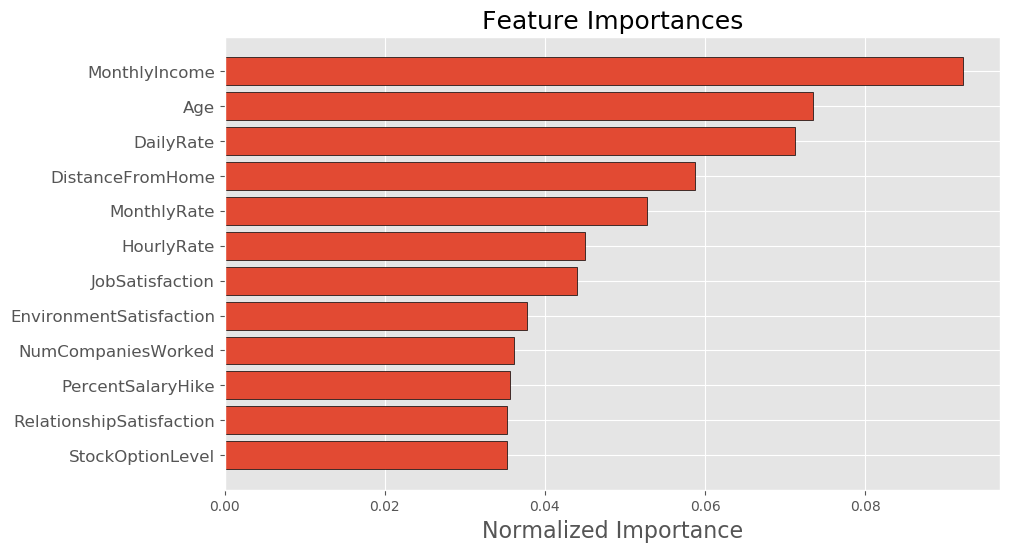

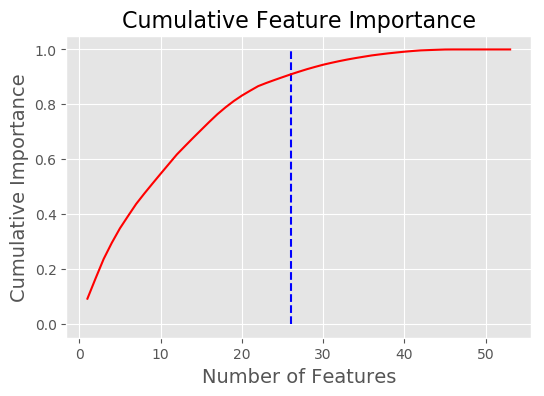

26 features required for 0.90 of cumulative importance


<Figure size 640x480 with 0 Axes>

In [63]:
fs.plot_feature_importances(threshold = 0.9, plot_n = 12)
# Save the Figure
plt.savefig("FeatureImportance1.png")
plt.savefig("FeatureImportance2.png")

In [61]:
zero_importance_features = fs.ops['zero_importance']
zero_importance_features[:]

['JobRole_Human Resources',
 'JobRole_Manager',
 'EducationField_Human Resources',
 'Department_Human Resources',
 'StandardHours',
 'Over18_Y',
 'PerformanceRating']